In [5]:
import json
import pandas as pd

tunisian_stock_market = 'Tunisian-Stock-Market.json'
with open(tunisian_stock_market, 'r') as json_file:
    
    json_data = json.load(json_file)

df = pd.DataFrame(json_data)
df = df.sort_values(by='Date')
# Display the first few rows of the DataFrame
print("DataFrame shape " , df.shape)
bna_data = df[df['Stock_name'] == 'BNA']
df.head(10)

DataFrame shape  (198886, 7)


,Date,Code_isin,Adj_Close,Stock_name,Adj_low,Adj_High,Volume
198885,2011-01-03,TN0001000108,17.995,MONOPRIX,17.789,17.995,9891.000000
198854,2011-01-03,TN0006550016,20.351,BH ASSURANCE,19.374,20.351,335565.125000
198853,2011-01-03,TN0006560015,2.290,SOTUVER,2.285,2.366,11472.030273
198852,2011-01-03,TN0006580013,0.787,SOTUMAG,0.769,0.787,1389.800049
198851,2011-01-03,TN0006590012,3.303,SIAME,3.272,3.303,11174.759766
198850,2011-01-03,TN0006610018,24.429,ATTIJARI LEASING,0.000,0.000,0.000000
198849,2011-01-03,TN0006640015,10.717,STEQ,0.000,0.000,0.000000
198848,2011-01-03,TN0006650014,6.299,ELECTROSTAR,6.299,6.466,11280.250000
198847,2011-01-03,TN0006660013,4.954,SOTRAPIL,4.686,4.954,2547.199951
198846,2011-01-03,TN0006670012,15.006,SIPHAT,15.006,15.006,106.750000


Descriptive Statistics:
                                Date    Adj_Close      Adj_low     Adj_High  \
count                           2689  2689.000000  2689.000000  2689.000000   
mean   2016-06-10 02:32:05.176645632     8.846972     8.517569     8.678691   
min              2011-01-03 00:00:00     5.053000     0.000000     0.000000   
25%              2013-09-27 00:00:00     7.115000     7.017000     7.121000   
50%              2016-06-08 00:00:00     8.223000     8.076000     8.251000   
75%              2019-02-19 00:00:00     9.916000     9.818000     9.999000   
max              2021-11-04 00:00:00    19.799000    19.356000    19.889000   
std                              NaN     2.457952     2.853659     2.915732   

             Volume  
count  2.689000e+03  
mean   1.708736e+05  
min    0.000000e+00  
25%    1.208680e+04  
50%    4.341140e+04  
75%    1.322846e+05  
max    1.801664e+07  
std    6.216704e+05  

Correlation Matrix:
           Adj_Close   Adj_low  Adj_High    V

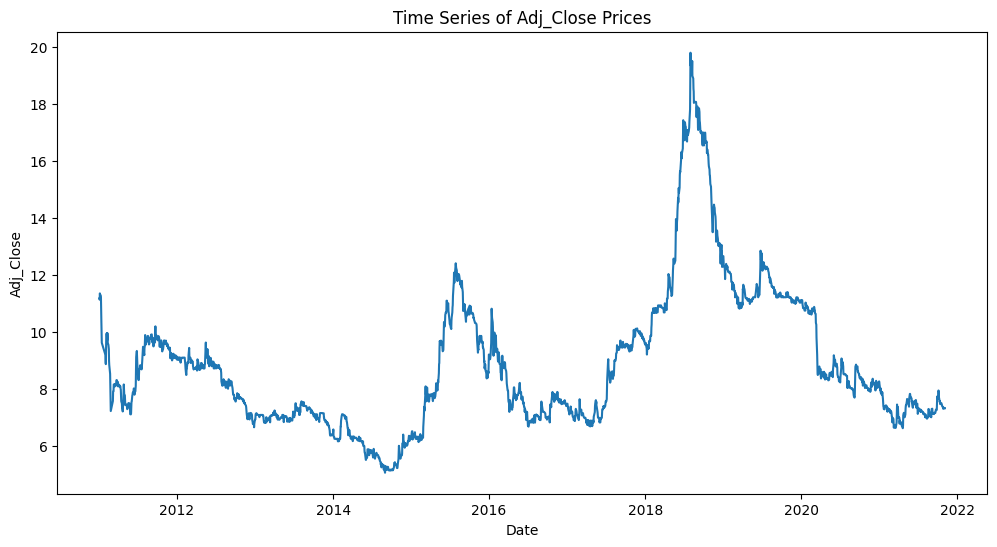

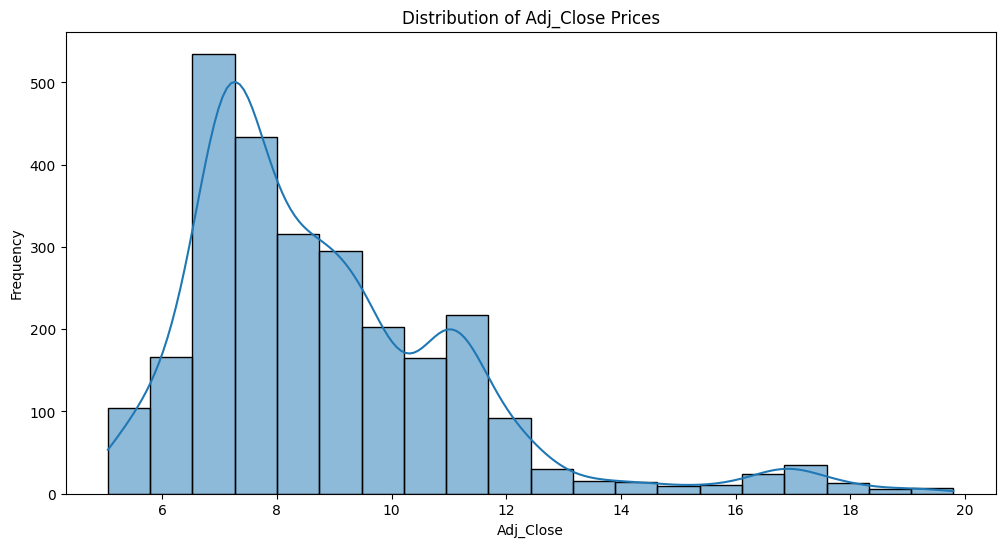

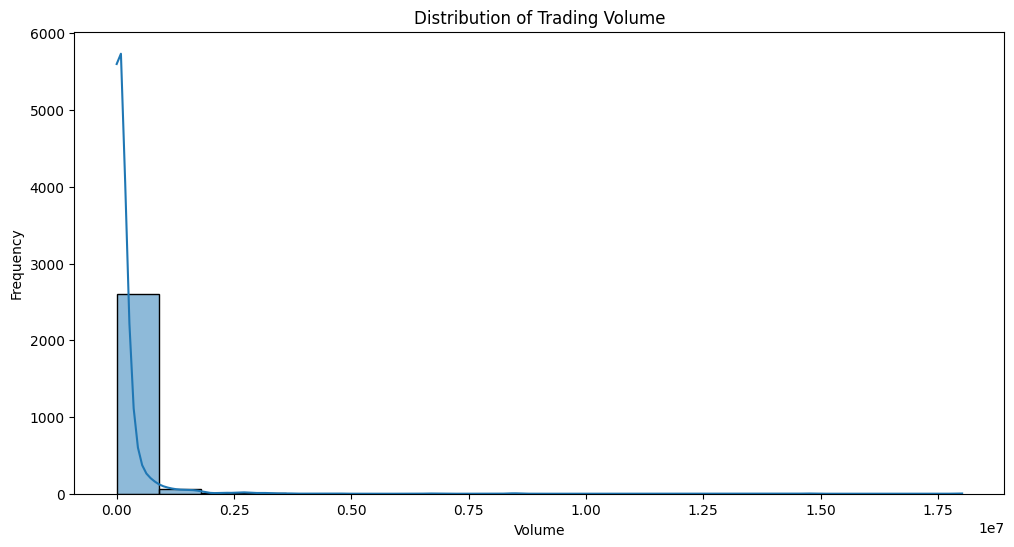

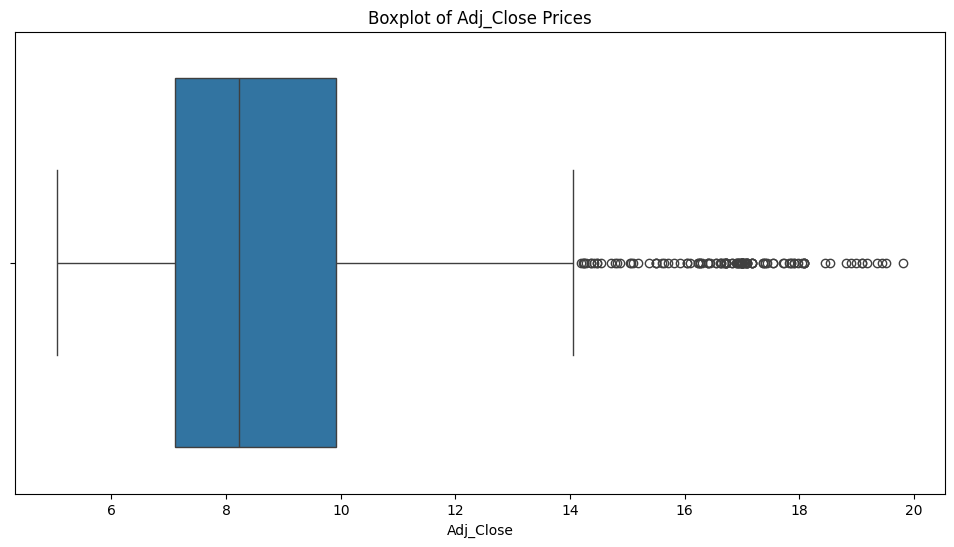

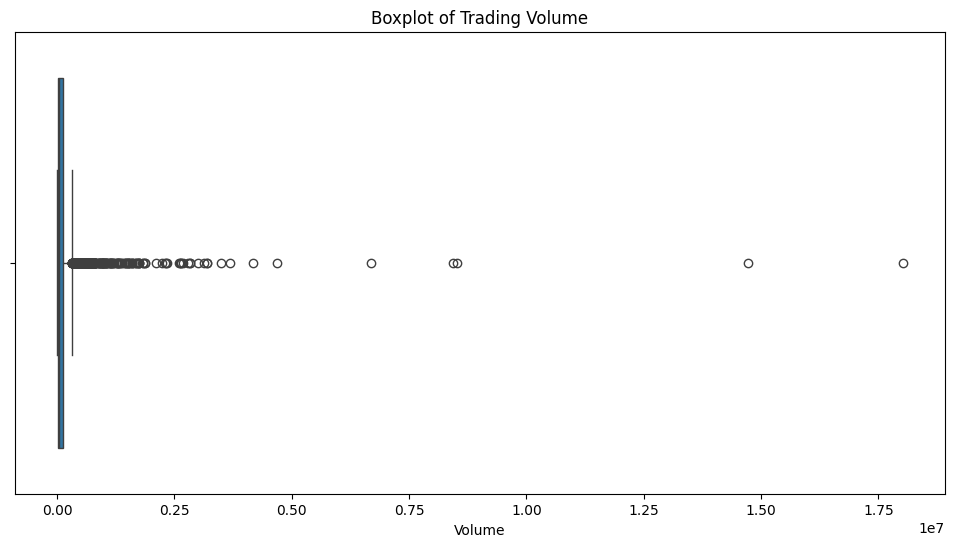

C:\Users\namid\AppData\Local\Temp\ipykernel_57088\2529850672.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_stock['20-Day Moving Average'] = single_stock['Adj_Close'].rolling(window=20).mean()
C:\Users\namid\AppData\Local\Temp\ipykernel_57088\2529850672.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_stock['50-Day Moving Average'] = single_stock['Adj_Close'].rolling(window=50).mean()


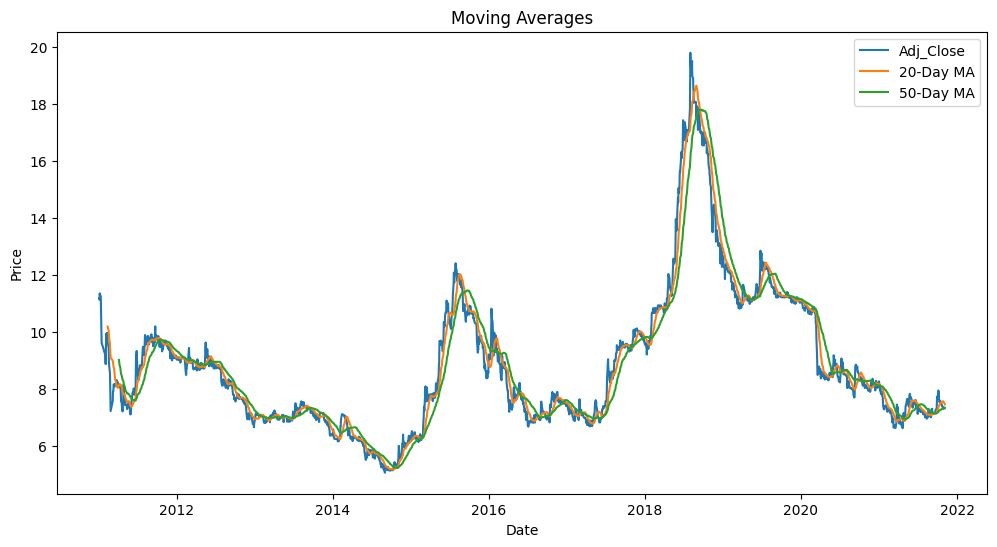

C:\Users\namid\AppData\Local\Temp\ipykernel_57088\2529850672.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_stock['Daily_Return'] = single_stock['Adj_Close'].pct_change()


Annualized Volatility: 0.23331851423007274



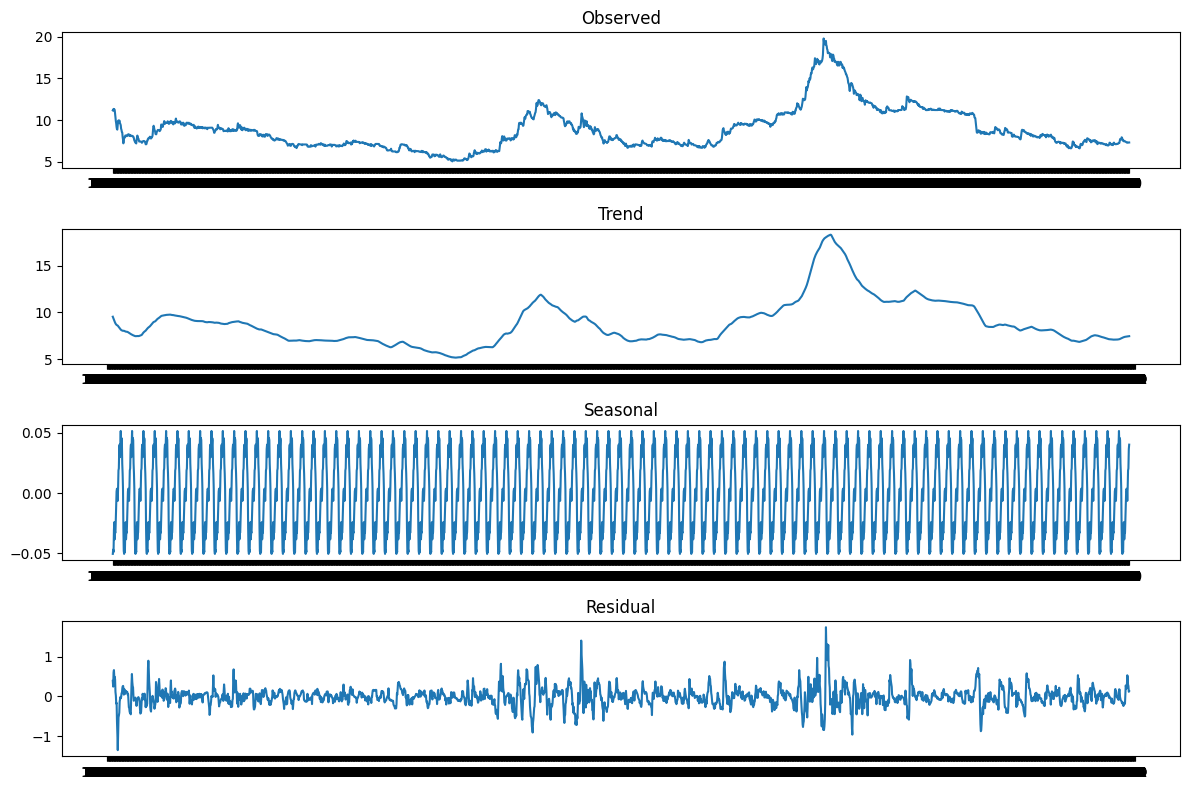

C:\Users\namid\AppData\Local\Temp\ipykernel_57088\2529850672.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_stock['RSI'] = compute_rsi(single_stock['Adj_Close'])


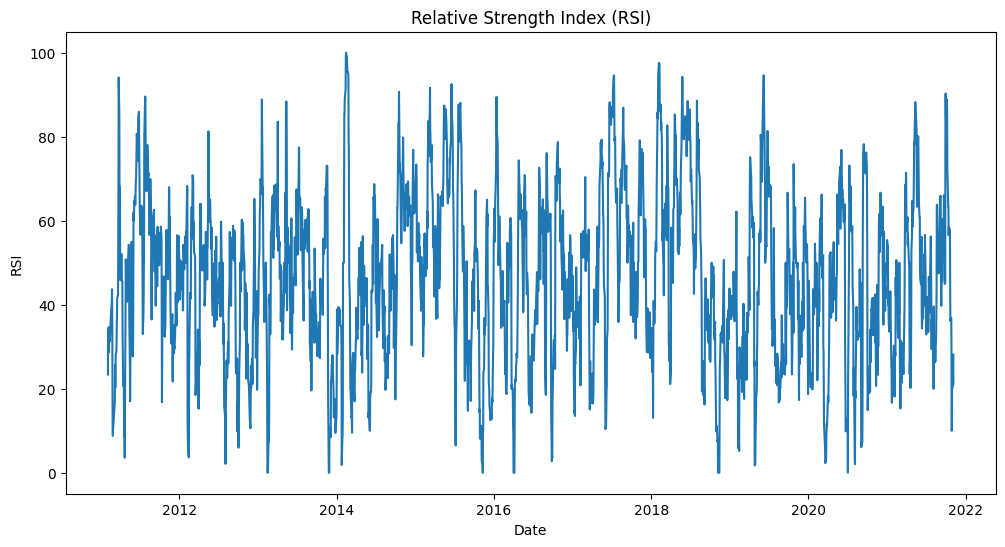

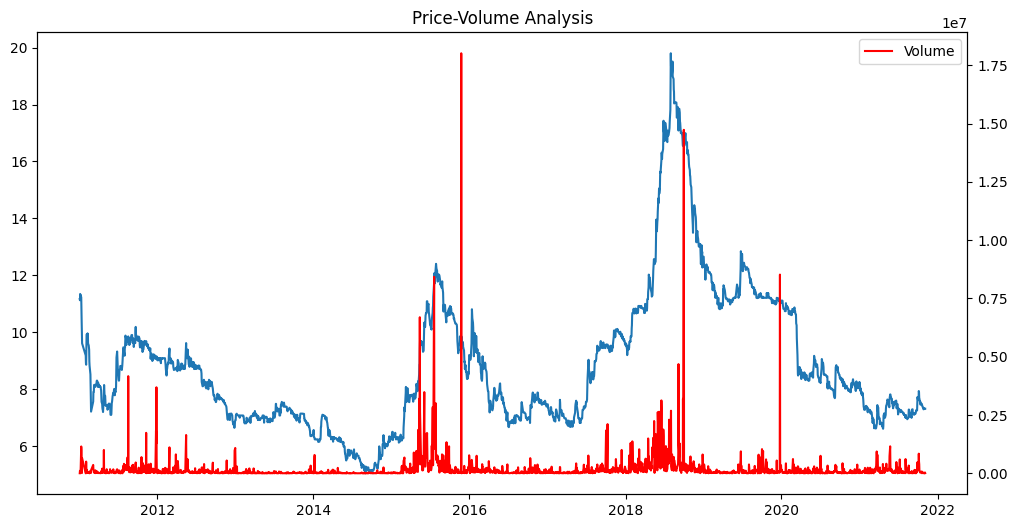

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for a single stock
single_stock = df[df['Stock_name'] == 'BNA']  # Replace 'YOUR_STOCK_NAME' with the actual stock name

# 1. Descriptive Statistics
descriptive_stats = single_stock.describe()
print("Descriptive Statistics:")
print(descriptive_stats)
print()

# 2. Correlation Analysis
correlation_matrix = single_stock[['Adj_Close', 'Adj_low', 'Adj_High', 'Volume']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
print()

# 3. Time Series Analysis
plt.figure(figsize=(12, 6))
plt.plot(single_stock['Date'], single_stock['Adj_Close'])
plt.xlabel('Date')
plt.ylabel('Adj_Close')
plt.title('Time Series of Adj_Close Prices')
plt.show()

# 4. Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(single_stock['Adj_Close'], bins=20, kde=True)
plt.xlabel('Adj_Close')
plt.ylabel('Frequency')
plt.title('Distribution of Adj_Close Prices')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(single_stock['Volume'], bins=20, kde=True)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume')
plt.show()

# 5. Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(x='Adj_Close', data=single_stock)
plt.title('Boxplot of Adj_Close Prices')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Volume', data=single_stock)
plt.title('Boxplot of Trading Volume')
plt.show()

# 6. Moving Average Analysis
single_stock['20-Day Moving Average'] = single_stock['Adj_Close'].rolling(window=20).mean()
single_stock['50-Day Moving Average'] = single_stock['Adj_Close'].rolling(window=50).mean()

# Plotting moving averages
plt.figure(figsize=(12, 6))
plt.plot(single_stock['Date'], single_stock['Adj_Close'], label='Adj_Close')
plt.plot(single_stock['Date'], single_stock['20-Day Moving Average'], label='20-Day MA')
plt.plot(single_stock['Date'], single_stock['50-Day Moving Average'], label='50-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.show()

# 7. Volatility Analysis
single_stock['Daily_Return'] = single_stock['Adj_Close'].pct_change()
volatility = single_stock['Daily_Return'].std() * np.sqrt(252)  # Assuming 252 trading days in a year
print("Annualized Volatility:", volatility)
print()

# 8. Seasonality Analysis
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(single_stock['Adj_Close'], model='additive', period=30)  # Assuming seasonality period of 30 days
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()

# 9. Relative Strength Index (RSI)
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

single_stock['RSI'] = compute_rsi(single_stock['Adj_Close'])
plt.figure(figsize=(12, 6))
plt.plot(single_stock['Date'], single_stock['RSI'])
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.show()

# 10. Price-Volume Analysis
plt.figure(figsize=(12, 6))
plt.plot(single_stock['Date'], single_stock['Adj_Close'], label='Adj_Close')
plt.twinx()
plt.plot(single_stock['Date'], single_stock['Volume'], color='red', label='Volume')
plt.xlabel('Date')
plt.title('Price-Volume Analysis')
plt.legend()
plt.show()

